In [25]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("shuffled_pdf_features.csv")



In [29]:
df.head()

,Filename,Page,Encrypt,ObjStm,JavaScript,AA,OpenAction,AcroForm,RichMedia,XFA,Colors,Label
0,70d91a31f85f1094c1e6571c7d213b3ca9e97bb6,1,0.0,0.0,1,0,1,0,0,0,0.0,1
1,atlantic_record.pdf,1,0.0,0.0,0,0,0,1,0,0,0.0,0
2,c9954f5f3fbfb3b150abe208c763d942043bfc0f,1,0.0,0.0,0,0,0,1,0,1,0.0,1
3,benign_2963.pdf,1,0.0,0.0,0,0,1,0,0,0,0.0,0
4,613d149863f6dfe8e2a76dc9a3ecee5cb0d63cb2,1,0.0,0.0,1,0,1,0,0,0,0.0,1


In [27]:
# converting lables to numeric
df["Label"] = df["Label"].map({"Malware": 1, "Benign": 0})

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40972 entries, 0 to 40971
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Filename    40972 non-null  object 
 1   Page        40971 non-null  object 
 2   Encrypt     40971 non-null  float64
 3   ObjStm      40971 non-null  float64
 4   JavaScript  40971 non-null  object 
 5   AA          40971 non-null  object 
 6   OpenAction  40971 non-null  object 
 7   AcroForm    40971 non-null  object 
 8   RichMedia   40971 non-null  object 
 9   XFA         40971 non-null  object 
 10  Colors      40971 non-null  float64
 11  Label       40972 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 3.8+ MB


In [30]:
df["Filename"].value_counts()

Filename
benign_9043.pdf                                                     1
70d91a31f85f1094c1e6571c7d213b3ca9e97bb6                            1
atlantic_record.pdf                                                 1
c9954f5f3fbfb3b150abe208c763d942043bfc0f                            1
benign_2963.pdf                                                     1
                                                                   ..
4f61ef484b87bb06da0e934b2c114b2b902cc1d77e6672c8b486b045812c1d16    1
fc2a84c5b28449c8929beac0f6de62a8ac68994d                            1
benign_6905.pdf                                                     1
benign_7810.pdf                                                     1
benign_804.pdf                                                      1
Name: count, Length: 40972, dtype: int64

In [31]:
df["Label"].value_counts()

Label
1    21865
0    19107
Name: count, dtype: int64

In [32]:
 df.describe()

,Encrypt,ObjStm,Colors,Label
count,40971.000000,40971.000000,40971.000000,40972.000000
mean,0.003978,0.746943,0.000464,0.533657
std,0.071994,4.711833,0.023689,0.498872
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000
max,2.000000,600.000000,2.000000,1.000000


In [33]:
df.dtypes

Filename       object
Page           object
Encrypt       float64
ObjStm        float64
JavaScript     object
AA             object
OpenAction     object
AcroForm       object
RichMedia      object
XFA            object
Colors        float64
Label           int64
dtype: object

In [34]:
df.isnull().sum()

Filename      0
Page          1
Encrypt       1
ObjStm        1
JavaScript    1
AA            1
OpenAction    1
AcroForm      1
RichMedia     1
XFA           1
Colors        1
Label         0
dtype: int64

In [35]:
# converting to numeric
cols_to_numeric = ['Page','JavaScript','AA','OpenAction','AcroForm','RichMedia','XFA','Colors']
df[cols_to_numeric] = df[cols_to_numeric].apply(pd.to_numeric, errors="coerce")


In [36]:
df.dtypes

Filename       object
Page          float64
Encrypt       float64
ObjStm        float64
JavaScript    float64
AA            float64
OpenAction    float64
AcroForm      float64
RichMedia     float64
XFA           float64
Colors        float64
Label           int64
dtype: object

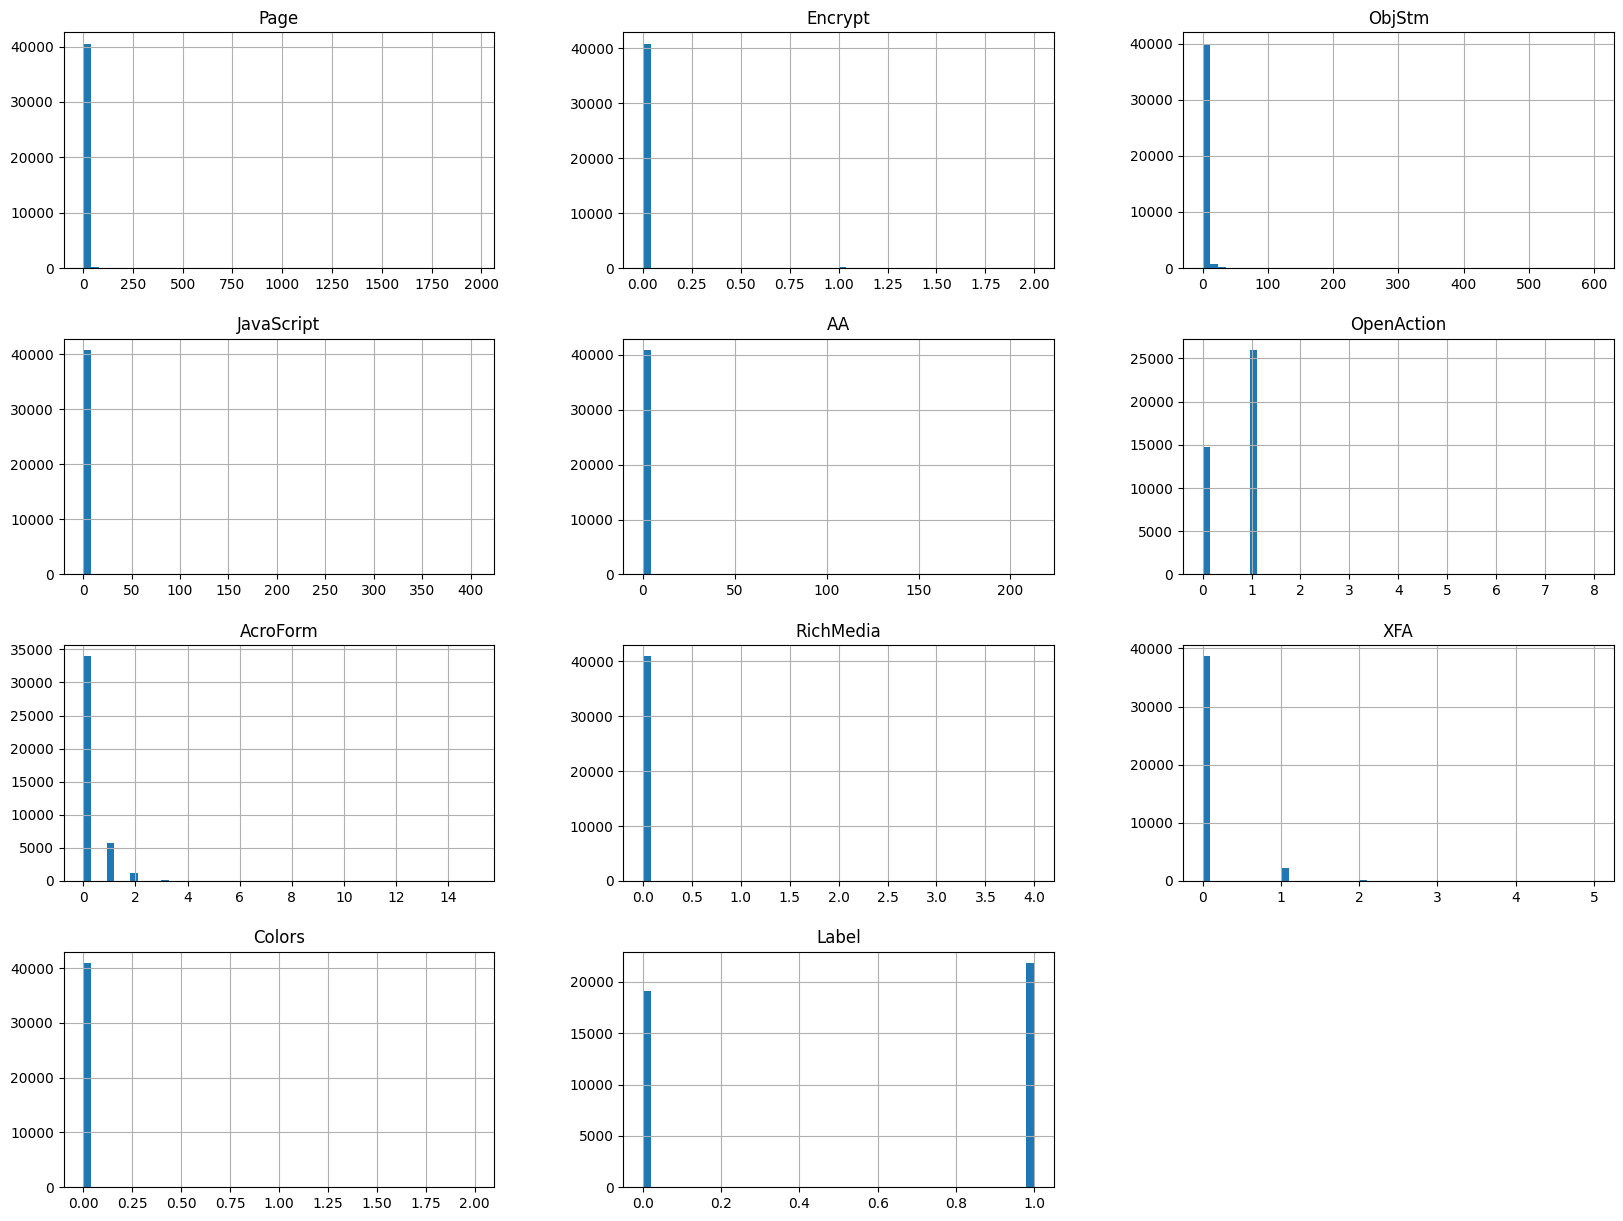

In [37]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15)) 
plt.show()


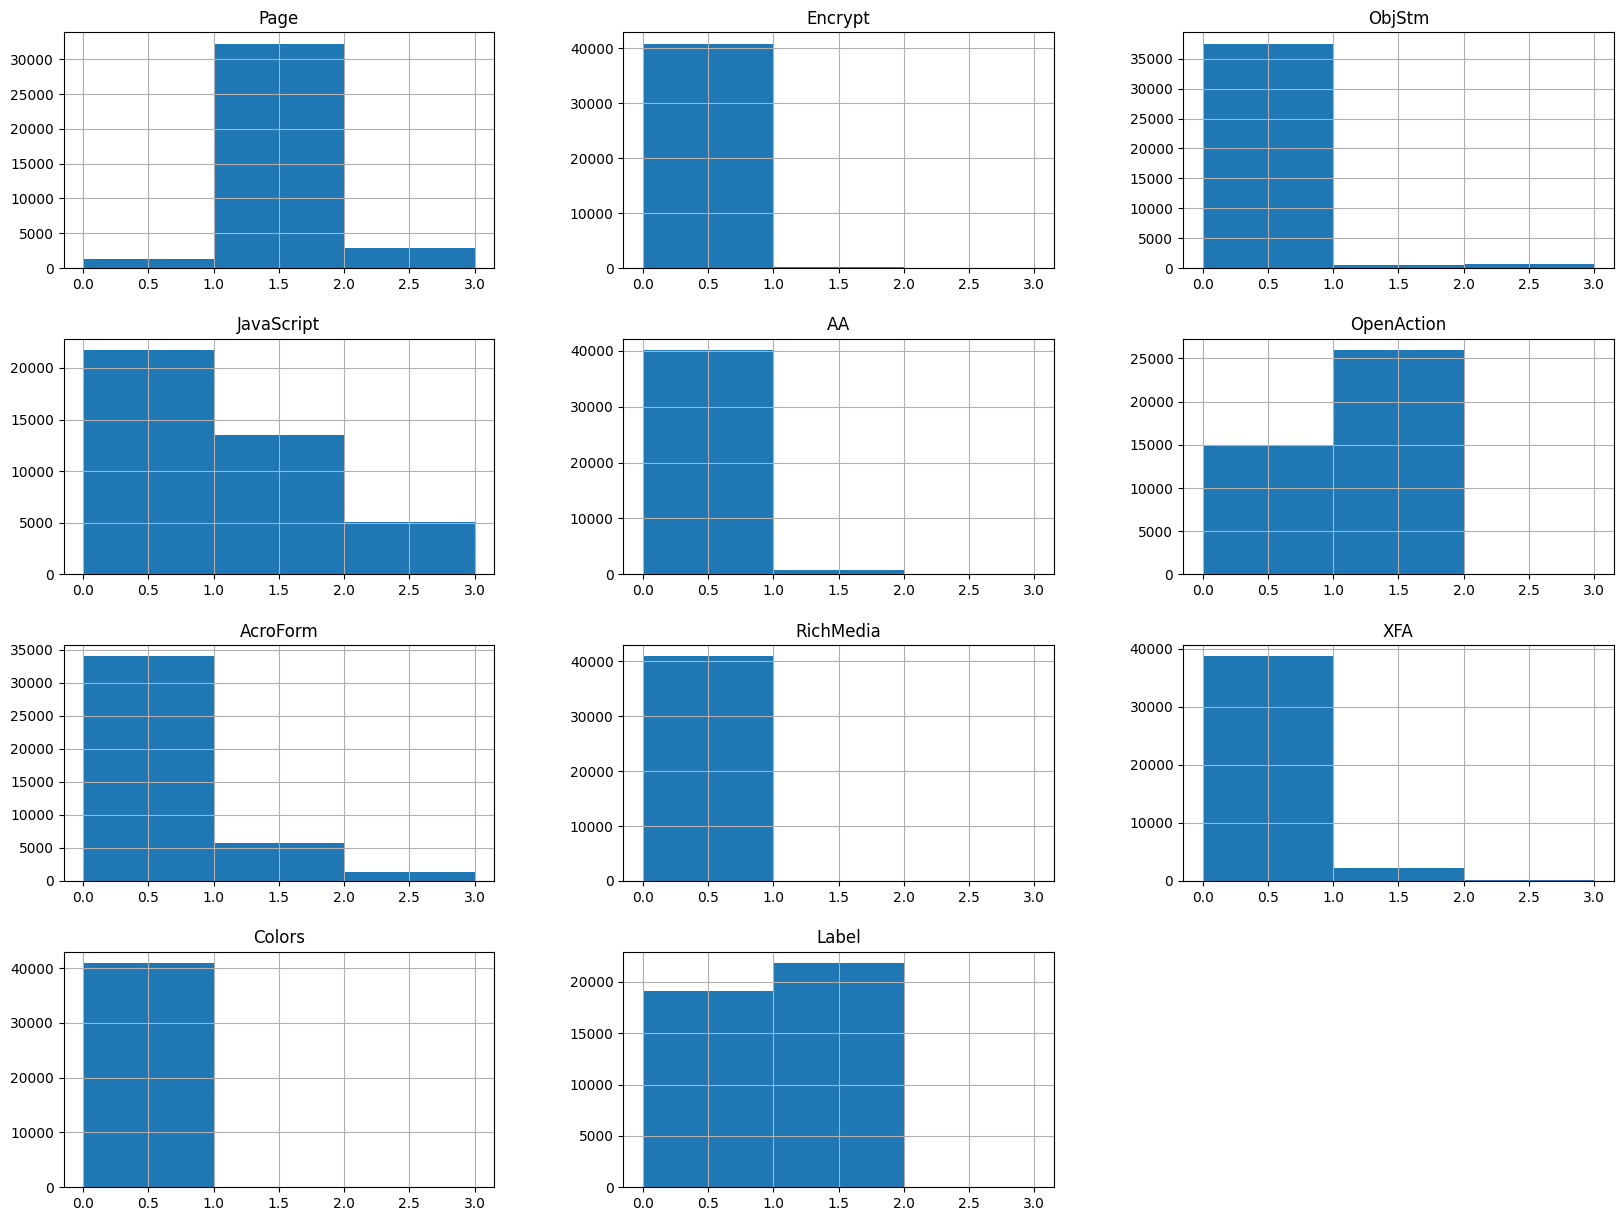

In [52]:
# Set custom bin edges
bin_edges = range(0, int(df['Encrypt'].max()) + 2, 1)  # For example, bin width = 1

# Plot histogram
df.hist(bins=bin_edges, figsize=(20, 15)) 
plt.show()

In [38]:
df.head()

,Filename,Page,Encrypt,ObjStm,JavaScript,AA,OpenAction,AcroForm,RichMedia,XFA,Colors,Label
0,70d91a31f85f1094c1e6571c7d213b3ca9e97bb6,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,atlantic_record.pdf,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,c9954f5f3fbfb3b150abe208c763d942043bfc0f,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,benign_2963.pdf,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,613d149863f6dfe8e2a76dc9a3ecee5cb0d63cb2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [39]:
df.fillna(0, inplace=True)

In [40]:
df.head()

,Filename,Page,Encrypt,ObjStm,JavaScript,AA,OpenAction,AcroForm,RichMedia,XFA,Colors,Label
0,70d91a31f85f1094c1e6571c7d213b3ca9e97bb6,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,atlantic_record.pdf,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,c9954f5f3fbfb3b150abe208c763d942043bfc0f,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,benign_2963.pdf,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,613d149863f6dfe8e2a76dc9a3ecee5cb0d63cb2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [43]:
# dropping the file name
df.drop(columns=['Filename'],inplace=True)

In [44]:
df.head()

,Page,Encrypt,ObjStm,JavaScript,AA,OpenAction,AcroForm,RichMedia,XFA,Colors,Label
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [45]:
df.columns

Index(['Page', 'Encrypt', 'ObjStm', 'JavaScript', 'AA', 'OpenAction',
       'AcroForm', 'RichMedia', 'XFA', 'Colors', 'Label'],
      dtype='object')

In [46]:
# removing the label from the featureset
X = df.drop(columns=['Label'])
# target feature 
y = df['Label']

In [47]:
X.head()

,Page,Encrypt,ObjStm,JavaScript,AA,OpenAction,AcroForm,RichMedia,XFA,Colors
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [48]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Label, dtype: int64

In [57]:
# Spliting Data for Training and Testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train 20% test

In [58]:
X_train.count()

Page          32777
Encrypt       32777
ObjStm        32777
JavaScript    32777
AA            32777
OpenAction    32777
AcroForm      32777
RichMedia     32777
XFA           32777
Colors        32777
dtype: int64

In [59]:
X_test.count()

Page          8195
Encrypt       8195
ObjStm        8195
JavaScript    8195
AA            8195
OpenAction    8195
AcroForm      8195
RichMedia     8195
XFA           8195
Colors        8195
dtype: int64

In [60]:
y_train.count()

np.int64(32777)

In [61]:
# training the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
# training
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred)

In [64]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


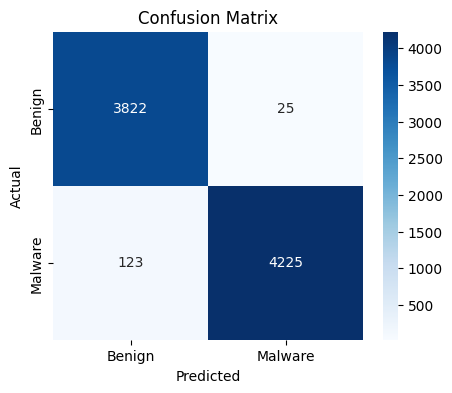

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3847
           1       0.99      0.97      0.98      4348

    accuracy                           0.98      8195
   macro avg       0.98      0.98      0.98      8195
weighted avg       0.98      0.98      0.98      8195



In [67]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
# y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malware'], yticklabels=['Benign', 'Malware'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [68]:
y_test.value_counts()

Label
1    4348
0    3847
Name: count, dtype: int64

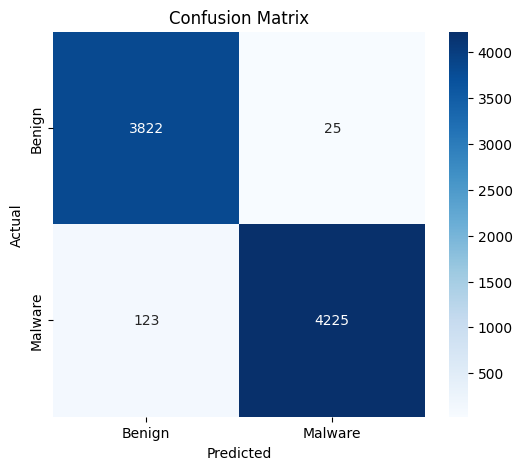

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
# True Positive : 4225
# True Negative 3822
# false Positive 25
# False Negative 123 

In [76]:
# Example: Lower threshold from 0.5 to 0.4
y_pred_proba = model.predict_proba(X_test)[:,1]  # Get probabilities for class 1 (Malware)
y_pred_adjusted = (y_pred_proba >= 0.4).astype(int)  # Change threshold

# Check new confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_adjusted)
print(cm)

[[3816   31]
 [ 121 4227]]


In [77]:
import joblib

# save the trained Randomforest model
joblib.dump(model, 'random_forest_pdf_detection_model.pkl')

['random_forest_pdf_detection_model.pkl']

In [79]:
# training an alternate model to compare differences
from sklearn.linear_model import LogisticRegression

In [80]:
# creating the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# training
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

# predict with the new model
y_pred_lr = lr_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      3847
           1       0.99      0.94      0.96      4348

    accuracy                           0.96      8195
   macro avg       0.96      0.97      0.96      8195
weighted avg       0.97      0.96      0.96      8195

Confusion Matrix:
 [[3809   38]
 [ 261 4087]]


In [82]:
joblib.dump(lr_model, 'Logistic_Regression_pdf_detection_model.pkl')

['Logistic_Regression_pdf_detection_model.pkl']